In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
train_df = pd.read_csv("../data/train(1).csv")
test_df = pd.read_csv("../data/test.csv")

In [6]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 타이타닉데이터 합쳐서 분석
- Name피처로부터 결혼 유무나 성별을 확인할 수 있음
- 정규표현식을 이용하여 Name피처 가공

In [8]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

# Name 컬럼 전처리
- str문법
- 문자열 데이터에 대한 전처리 작업 진행 시 사용
- 정규표현식 사용 

In [15]:
#str 문법과 정규표현식을 이용해서 전처리
for df in combine:
    df['Name_re'] = df.Name.str.extract('([A-Za-z]+)\.', expand=True) 

In [16]:
pd.crosstab(train_df['Name_re'],train_df['Sex'])

Sex,female,male
Name_re,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
# replace 파이썬 기초문법
for df in combine:
    df['Name_re'] = df['Name_re'].replace(['Lady','Countess','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    df['Name_re'] = df['Name_re'].replace('Mlle','Miss')
    df['Name_re'] = df['Name_re'].replace('Ms','Miss')
    df['Name_re'] = df['Name_re'].replace('Mme','Miss')

In [18]:
train_df[['Name_re','Survived']].groupby(['Name_re'],as_index=False).mean()

,Name_re,Survived
0,Capt,0.000000
1,Master,0.575000
2,Miss,0.704301
3,Mr,0.156673
4,Mrs,0.792000
5,Rare,0.363636


In [19]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [20]:
# 레이블인코딩으로 변환 
name_re = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,'Rare':5}

for df in combine:
    df['Name_re'] = df['Name_re'].map(name_re) #map함수와 판다스의 시리즈가 만나서 해당 값으로 변환해 준다.
    df['Name_re'] = df['Name_re'].fillna(0)
    


In [21]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1.0


# Sex 컬럼 전처리

In [22]:
#전처리 후 남은 사용한 컬럼은 제거
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [23]:
for df in combine:
    df['Sex'] = df['Sex'].map({'female':1, 'male':0}).astype(int)

In [24]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Name_re       0
dtype: int64

# age 컬럼 전처리
- Missing Value 대체하는 방법
- MICE
- 보간법
- 단순한 기초통계치로 대체하는 법
- KNN, ML 기법을 통해서 대체하는 법 

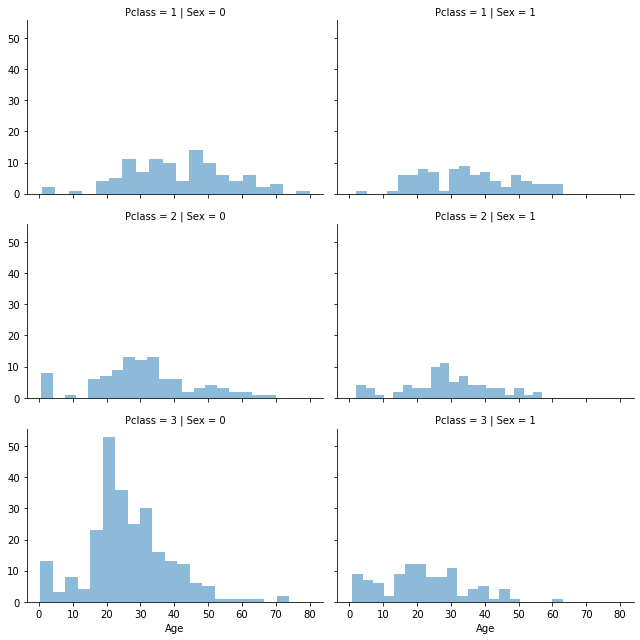

In [26]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect =1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [27]:
guess_ages = np.zeros((2,3))

In [28]:
# pclass, 성별 2 두가지의 차원으로 결측치를 바라볼 것
# 두 가지의 피처로 값을 추출하면서 이 값의 median의 값을 -> guess_ages 넣어서 대체

for df in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = df[(df['Sex']==i) & (df['Pclass']==j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            guess_ages[i,j] = (age_guess/0.5 + 0.5) * 0.5
            
            
    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df.Age.isnull()) & (df.Sex ==i)&(df.Pclass==j+1), 'Age'] = guess_ages[i,j]
    df['Age'] = df['Age'].astype(int)

In [29]:
train_df.Age.isna().sum()

0

In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


In [31]:
train_df.Age.value_counts()

25    117
21     66
30     36
40     36
24     31
     ... 
12      1
53      1
80      1
66      1
74      1
Name: Age, Length: 71, dtype: int64

In [32]:
max(train_df['Age'])

80

In [33]:
min(train_df['Age'])

0

In [34]:
train_df['Agerange']=pd.cut(train_df['Age'],5)

In [35]:
train_df[['Agerange','Survived']].groupby(['Agerange'],as_index=False).mean().sort_values(by='Agerange',ascending=False)

,Agerange,Survived
4,"(64.0, 80.0]",0.090909
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
0,"(-0.08, 16.0]",0.550000


## age ->인코딩하는 작업으로 데이터 전처리

In [36]:
for df in combine:
    df.loc[df['Age']<=16,'Age'] = 0
    df.loc[(df['Age']>16) & (df['Age']<=32), 'Age']=1 
    df.loc[(df['Age']>32) & (df['Age']<=48), 'Age']=2
    df.loc[(df['Age']>48) & (df['Age']<=64), 'Age']=3
    df.loc[df['Age']>64,'Age'] =4

#위에 pd.cut 구간으로해서 데이터를 인코딩 진행 완료

In [37]:
train_df.Age.value_counts()

1    495
2    216
0    100
3     69
4     11
Name: Age, dtype: int64

In [38]:
train_df = train_df.drop(['Agerange'],axis=1)

In [39]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,1,1,0,7.2500,S,1.0
1,1,1,1,2,1,0,71.2833,C,3.0
2,1,3,1,1,0,0,7.9250,S,2.0
3,1,1,1,2,1,0,53.1000,S,3.0
4,0,3,0,2,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5.0
887,1,1,1,1,0,0,30.0000,S,2.0
888,0,3,1,1,1,2,23.4500,S,2.0
889,1,1,0,1,0,0,30.0000,C,1.0


## sibsp, parch
- 두 개 컬럼이 가족과 관련한 동승자와 관련한 컬럼
- 이 두 가지를 합쳐서 새로운 컬럼을 만들고 그 컬럼을 통해서 피처 가공

- 이 두 가지를 합쳐서 -> 새로운 하나의 파생변수 FamilySize

In [41]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Name_re  \
 0           0       3    0    1      1      0   7.2500        S      1.0   
 1           1       1    1    2      1      0  71.2833        C      3.0   
 2           1       3    1    1      0      0   7.9250        S      2.0   
 3           1       1    1    2      1      0  53.1000        S      3.0   
 4           0       3    0    2      0      0   8.0500        S      1.0   
 ..        ...     ...  ...  ...    ...    ...      ...      ...      ...   
 886         0       2    0    1      0      0  13.0000        S      5.0   
 887         1       1    1    1      0      0  30.0000        S      2.0   
 888         0       3    1    1      1      2  23.4500        S      2.0   
 889         1       1    0    1      0      0  30.0000        C      1.0   
 890         0       3    0    1      0      0   7.7500        Q      1.0   
 
          Agerange  
 0    (16.0, 32.0]  
 1    (32.0, 48.0]  
 2    (16.0

In [42]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

In [43]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Name_re  \
 0           0       3    0    1      1      0   7.2500        S      1.0   
 1           1       1    1    2      1      0  71.2833        C      3.0   
 2           1       3    1    1      0      0   7.9250        S      2.0   
 3           1       1    1    2      1      0  53.1000        S      3.0   
 4           0       3    0    2      0      0   8.0500        S      1.0   
 ..        ...     ...  ...  ...    ...    ...      ...      ...      ...   
 886         0       2    0    1      0      0  13.0000        S      5.0   
 887         1       1    1    1      0      0  30.0000        S      2.0   
 888         0       3    1    1      1      2  23.4500        S      2.0   
 889         1       1    0    1      0      0  30.0000        C      1.0   
 890         0       3    0    1      0      0   7.7500        Q      1.0   
 
          Agerange  FamilySize  
 0    (16.0, 32.0]           2  
 1    (3

In [44]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1 # 가족과 관련된 컬럼 -> 패밀리 수치로 바꿈 

combine[0][['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [45]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Name_re  \
 0           0       3    0    1      1      0   7.2500        S      1.0   
 1           1       1    1    2      1      0  71.2833        C      3.0   
 2           1       3    1    1      0      0   7.9250        S      2.0   
 3           1       1    1    2      1      0  53.1000        S      3.0   
 4           0       3    0    2      0      0   8.0500        S      1.0   
 ..        ...     ...  ...  ...    ...    ...      ...      ...      ...   
 886         0       2    0    1      0      0  13.0000        S      5.0   
 887         1       1    1    1      0      0  30.0000        S      2.0   
 888         0       3    1    1      1      2  23.4500        S      2.0   
 889         1       1    0    1      0      0  30.0000        C      1.0   
 890         0       3    0    1      0      0   7.7500        Q      1.0   
 
          Agerange  FamilySize  
 0    (16.0, 32.0]           2  
 1    (3

In [46]:
for dataset in combine:
    dataset['IsAlone'] =0
    dataset.loc[dataset['FamilySize']==1 , 'IsAlone'] =1

In [47]:
combine[0][['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [48]:
combine[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,1,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,1,1,1
3,895,3,0,1,0,0,8.6625,S,1,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1,1,1
414,1306,1,1,2,0,0,108.9000,C,5,1,1
415,1307,3,0,2,0,0,7.2500,S,1,1,1
416,1308,3,0,1,0,0,8.0500,S,1,1,1


In [49]:
#train_df에 우리가 만든 파생변수를 같이 넣자!
train_df=combine[0].drop(['Agerange','SibSp','Parch'],axis=1)
test_df= combine[1].drop(['SibSp','Parch'],axis=1)

In [50]:
combine[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,1,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,1,1,1
3,895,3,0,1,0,0,8.6625,S,1,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1,1,1
414,1306,1,1,2,0,0,108.9000,C,5,1,1
415,1307,3,0,2,0,0,7.2500,S,1,1,1
416,1308,3,0,1,0,0,8.0500,S,1,1,1


In [51]:
combine = [train_df,test_df]

In [52]:
combine

[     Survived  Pclass  Sex  Age     Fare Embarked  Name_re  FamilySize  \
 0           0       3    0    1   7.2500        S      1.0           2   
 1           1       1    1    2  71.2833        C      3.0           2   
 2           1       3    1    1   7.9250        S      2.0           1   
 3           1       1    1    2  53.1000        S      3.0           2   
 4           0       3    0    2   8.0500        S      1.0           1   
 ..        ...     ...  ...  ...      ...      ...      ...         ...   
 886         0       2    0    1  13.0000        S      5.0           1   
 887         1       1    1    1  30.0000        S      2.0           1   
 888         0       3    1    1  23.4500        S      2.0           4   
 889         1       1    0    1  30.0000        C      1.0           1   
 890         0       3    0    1   7.7500        Q      1.0           1   
 
      IsAlone  
 0          0  
 1          0  
 2          1  
 3          0  
 4          1  
 .

## Age 컬럼과 Pclass로 새로운 변수로 만들기 
- 나이와 타이타닉의 선박의 등급 두 개의 값을 곱해서 하나의 파생변수 생성

In [53]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass

In [54]:
train_df.loc[:, ['Age*Pclass', 'Age','Pclass']]

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
...,...,...,...
886,2,1,2
887,1,1,1
888,3,1,3
889,1,1,1


In [55]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
Name_re       0
FamilySize    0
IsAlone       0
Age*Pclass    0
dtype: int64

In [58]:
freq_value=train_df['Embarked'].dropna().mode()[0] #최빈값으로 대체

In [59]:
#Embarked 데이터 전처리

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_value) # 2개의 na값이 빈도가 가장 높았던 'S'로 대체

train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [62]:
#결측값 처리됨
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Name_re       0
FamilySize    0
IsAlone       0
Age*Pclass    0
dtype: int64

In [63]:
# Embarked ->인코딩 작업 진행

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1 , 'Q':2}).astype(int) #문자열 ->수치로
    
    
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_re,FamilySize,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1.0,2,0,3
1,1,1,1,2,71.2833,1,3.0,2,0,2
2,1,3,1,1,7.9250,0,2.0,1,1,3
3,1,1,1,2,53.1000,0,3.0,2,0,2
4,0,3,0,2,8.0500,0,1.0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,0,5.0,1,1,2
887,1,1,1,1,30.0000,0,2.0,1,1,1
888,0,3,1,1,23.4500,0,2.0,4,0,3
889,1,1,0,1,30.0000,1,1.0,1,1,1


In [64]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Name_re        0
FamilySize     0
IsAlone        0
Age*Pclass     0
dtype: int64

In [65]:
## test fare 요금의 결측값 대체하는 법
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True) #na값 1개를 median으로 대체

In [66]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Name_re        0
FamilySize     0
IsAlone        0
Age*Pclass     0
dtype: int64

In [68]:
#fare요금 qcut,cut이용하여 전처리 작업
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)

train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [69]:
train_df.FareBand.value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: FareBand, dtype: int64

In [70]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <=7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare'] >31, 'Fare']= 3
    dataset['Fare'] =dataset['Fare'].astype('int')

train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df, test_df]

In [71]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_re,FamilySize,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1.0,2,0,3
1,1,1,1,2,3,1,3.0,2,0,2
2,1,3,1,1,1,0,2.0,1,1,3
3,1,1,1,2,3,0,3.0,2,0,2
4,0,3,0,2,1,0,1.0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5.0,1,1,2
887,1,1,1,1,2,0,2.0,1,1,1
888,0,3,1,1,2,0,2.0,4,0,3
889,1,1,0,1,2,1,1.0,1,1,1
